# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

## Librerías de Uso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import altair as alt
import seaborn as sns
import datetime as dt
from random import seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ShuffleSplit
%matplotlib inline
seed(2) #Mantener el mismo set de aleatorios

## Preprocesamiento

In [2]:
df = pd.read_csv('./datos/diabetes.csv')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.269723e-16,-8.016463e-16,1.288562e-16,-8.992304e-17,1.296097e-16,-4.563971e-16,3.875733e-16,-3.845592e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


### Lista de Transformaciones a aplicar
Se aplicaran transforamciones a los datos con el fin de suavizar el comportamiento descrito por los mismos, buscando un mejor
comportamiento del modelo. Las transformaciones son:
- Logaritmo Natural (Modificada para evitar valores límite)
- Raíz Cuadrada (Modificada para evitar valores imposibles)
- Raíz Cúbica
- 1/Logaritmo Natural (Modificada para evitar valores límite y divisón por 0)


In [5]:
##Función para aplicar las transformaciones
trans_list = ['log','sqrt','cbrt','log_1','norm'] #Lista de transformaciones, norm es aquella que no se le aplica ninguna

def transform(trans,data, inv = False):
    if (inv):
        if (trans == 'log'):
            return np.exp(data) - 1 #
        elif(trans == 'sqrt'):
            return np.power(data,2) -1
        elif(trans == 'cbrt'):
            return np.power(data,3)
        elif(trans == 'log_1'):
            return np.exp(np.divide(1,data)) - 1.1 
        else:
            return data
    else:        
        if (trans == 'log'): #Logaritmo Natural
            return np.log(data+1) #Prevenir Log 0
        elif(trans == 'sqrt'): #Raíz Cuadrada
            return np.sqrt(data+1)
        elif(trans == 'cbrt'): #Raíz Cúbica
            return np.cbrt(data)
        elif(trans == 'log_1'): #1/log()
            return np.divide(1, np.log(data + 1.1)) #Se añade el +1.1 para prevenir división por 0
        else:
            return data

Se crea un dataframe en el que se contienen todas las transformaciones para cada variable

In [6]:
#Falta agregar las variables a las que no se les aplica ninguna transformación pero se normaliza

trans_df = df.copy()
trans_df = trans_df.drop('Y', axis=1)
max_variables = len(trans_df.columns)
output_df = pd.DataFrame(df['Y'], columns = ['Y']) #Dataframe de Y, y transformaciones de Y
scalers = dict()
##Crear el nuevo Dataframe, con todas las transformaciones aplicadas
for trans in trans_list:
    y_values = np.asarray(df['Y']).reshape(-1,1)
    y_values = transform(trans, y_values)  #Aplicar la transformación
    scaler = MinMaxScaler() #Crear el scaler
    scaler = scaler.fit(y_values) #Ajustar el scaler
    y_values = scaler.transform(y_values).ravel() #Obtener valores escalados de la transformación
    scalers['Y-'+trans] = scaler #Guardar el scaler de la columna-transformación
    output_df['Y-'+trans] = y_values#Guardar los valores transformados y escalados
    for column in df.columns:
        if (column != 'Y'):
            values = np.asarray(df[column]).reshape(-1,1)
            values = transform(trans,values) 
            scaler = MinMaxScaler()
            scaler = scaler.fit(values)
            scalers[column+"-"+trans] = scaler
            values = scaler.transform(values).ravel()
            trans_df[column+"-"+trans] = values

#Quitar valores sin normalizar
output_df = output_df.drop('Y',axis=1)
for column in df.columns:
    if (column != 'Y'):
        trans_df = trans_df.drop(column, axis=1)
trans_df.head()


,age-log,sex-log,bmi-log,bp-log,s1-log,s2-log,s3-log,s4-log,s5-log,s6-log,...,age-norm,sex-norm,bmi-norm,bp-norm,s1-norm,s2-norm,s3-norm,s4-norm,s5-norm,s6-norm
0,0.690318,1.0,0.612798,0.579096,0.324106,0.287401,0.231585,0.308225,0.593808,0.473586,...,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.510619,0.0,0.165682,0.380472,0.455943,0.340305,0.654788,0.157074,0.246018,0.186979,...,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667
2,0.893978,1.0,0.547836,0.466774,0.318937,0.289533,0.273415,0.308225,0.529034,0.442835,...,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091
3,0.092201,0.0,0.329049,0.336631,0.529855,0.485068,0.259525,0.453884,0.604283,0.504078,...,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697
4,0.543821,0.0,0.228291,0.579096,0.500472,0.454797,0.422811,0.308225,0.393076,0.364800,...,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333


In [7]:
output_df.head()

,Y-log,Y-sqrt,Y-cbrt,Y-log_1,Y-norm
0,0.681447,0.534397,0.586148,0.206996,0.392523
1,0.413949,0.267485,0.315684,0.441590,0.155763
2,0.655184,0.503910,0.556793,0.227132,0.361371
3,0.800633,0.686565,0.727950,0.122060,0.563863
4,0.638523,0.485101,0.538509,0.240195,0.342679


### División de Conjuntos para Entrenamiento, Testing y Pronóstico

In [8]:
N = df['Y'].size 
P = N * 20 // 100 # 20% forecasting
T = N * 10 // 100 # 10% testing
# El 70% restante para fitting

## Regresión Lineal y Relevancia de las variables

Para encontrar las variables más relevantes y obtener el mejor modelo de regresión lineal como base, se irá
comformando un modelo de la siguiente manera:
- Se elige una transformación de la salida (Y).
- Se realiza una regresión lineal con cada combinación 'variable-transformación' y se escoge la del menor para agregarla a la  regresión base, este proceso se realiza de forma iterativa hasta que no se note mejora del error o se usen todas las variables disponibles.
- Se repite este proceso para cada transformación de la salida (Y).
</br>
<p>Haciendo esto nos aseguramos al tiempo de obtener las variables que son relevantes, ya que las que no sean relevantes no agrepgaran mejora alguna a la regresión lineal.</p>

In [9]:
test_y = df.loc[(N-(P+T)):(N-P), 'Y'].values.reshape(-1,1) # Y test
best_models = []
models_df = pd.DataFrame(columns=["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","ECM"])
for column_y in output_df.columns: #Para cada transformación de Y
    fit_y = np.asarray(output_df.loc[:(N-(P+T)), column_y]).reshape(-1,1) # Y entrenamiento
    trans_y = column_y.split("-")[1] #Transformación del Y
    scaler_y = scalers[column_y] #Scaler de la transformación en Y
    ecm_model = 0 #Error actual del modelo
    columns_added = [] #Variables lineales añadidas
    variables_added = [] #Variables lineales añadidas
    previous_fit_x = None #Datos de entrenamiento anterior
    previous_test_x = None #Datos de test anterior
    for v in range(max_variables): #Realizar esto al menos una vez para cada variable de los datos
        min_ecm = 0 #Error mínimo a para agregar la variable
        best_column = None #Mejor variable para agregar al modelo
        for column_trans in trans_df.columns: #Para cada posible variable (variable-transformación)
            variable = column_trans.split("-")[0] #Extraer que variable es
            if(not(variable in variables_added)): #Verificar que la variable aún no se halla añadido
                if (len(columns_added) == 0): #Primera iteración
                    fit_x = trans_df.loc[:(N-(P+T)), column_trans]
                    test_x = trans_df.loc[(N-(P+T)):(N-P), column_trans]
                    fit_x = np.asarray(fit_x).reshape(-1, 1)
                    test_x = np.asarray(test_x).reshape(-1, 1)
                else:
                    #Se concatenan los valores, si ya existía un modelo previo
                    cur_fit_x = trans_df.loc[:(N-(P+T)), column_trans]
                    cur_fit_x = np.asarray(cur_fit_x).reshape(-1,1)
                    cur_test_x = trans_df.loc[(N-(P+T)):(N-P), column_trans]
                    cur_test_x = np.asarray(cur_test_x).reshape(-1,1)
                    fit_x = np.hstack((previous_fit_x,cur_fit_x)) #Añadir valores
                    test_x = np.hstack((previous_test_x,cur_test_x)) #Añadir valores
                regressor = LinearRegression()
                regressor.fit(fit_x,fit_y)
                forecast_y = regressor.predict(test_x)
                forecast_y = scaler_y.inverse_transform(forecast_y.reshape(-1,1))
                forecast_y = transform(trans_y,forecast_y,True)
                ecm = mean_squared_error(test_y,forecast_y)
                if (best_column == None or ecm < min_ecm):
                    #Si el error disminuye, poner como la mejor columna de la iteración
                    min_ecm = ecm
                    best_column = column_trans
        if (len(columns_added) == 0 or min_ecm < ecm_model): 
            #Si el error mejora después de encontrar la mejor columna añadida, se actualiza el modelo
            previous_fit_x = fit_x
            previous_test_x = test_x
            columns_added.append(best_column) 
            ecm_model = min_ecm
            variables_added.append(best_column.split("-")[0])
        else:
            ##Si el error no mejora al agregar la mejor variable de esta iteración, no mejorará más
            print()
            break
    new_model = dict()
    new_model["Y"] = column_y
    new_model["ECM"] = ecm_model
    for i in range(len(columns_added)):
        new_model["X"+str((i+1))] = columns_added[i]
    models_df = models_df.append(new_model, ignore_index=True)
    

models_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,ECM,Y
0,s4-log,bmi-log,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3028.658437,Y-log
1,s4-log,bmi-log,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2770.162777,Y-sqrt
2,s4-log,bmi-log,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2842.996728,Y-cbrt
3,s4-log,bmi-log,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3355.606176,Y-log_1
4,bmi-log,s4-norm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2628.567444,Y-norm


### Elección del Modelo Base como Regresión Lineal

Finalmente se elige el modelo que presenta el menor error de entrenamiento, que en este caso solo tiene en cuenta las variables bmi y s4, con la transformación de 'log' y 'norm' respectivamente y por último con la salida 'Y-norm' que es la variable Y original sin ninguna transformación a parte del escalado

In [10]:
best_model = models_df[models_df.ECM == models_df.ECM.min()]
best_model.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,ECM,Y
4,bmi-log,s4-norm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2628.567444,Y-norm


### Resultados de la regresión lineal escogida

La regresión lineal aunque es una buena aproximación y sirve como modelo base, no realiza un pronóstico confiable y mantiene un error bastante alto

Error de Predicción: 3810.4897605326446


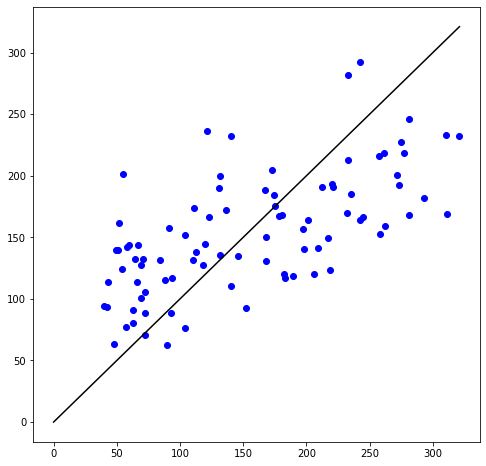

In [11]:
l_regression = LinearRegression()
best_column_y = best_model['Y'].values[0]
fit_y = np.asarray(output_df.loc[:(N-(P+T)),best_column_y])
real_y = np.asarray(df.loc[(N-P):,'Y'])
for i in range(max_variables):
    v = i+1
    column_name = best_model['X'+str(v)].values[0]
    if isinstance(column_name, str): 
        if (i == 0):
            fit_x = trans_df.loc[:(N-(P+T)),column_name]
            fit_x = np.asarray(fit_x).reshape(-1, 1)
            forecast_x = trans_df.loc[(N-P):,column_name]
            forecast_x = np.asarray(forecast_x).reshape(-1, 1)
        else:
            stack_fit_x = trans_df.loc[:(N-(P+T)),column_name]
            stack_fit_x = np.asarray(stack_fit_x).reshape(-1, 1)
            fit_x = np.hstack((fit_x,stack_fit_x))
            stack_forecast_x = trans_df.loc[(N-P):,column_name]
            stack_forecast_x = np.asarray(stack_forecast_x).reshape(-1, 1)
            forecast_x = np.hstack((forecast_x,stack_forecast_x))

l_regression.fit(fit_x, fit_y) 
forecast_y = l_regression.predict(forecast_x) #Pronóstico con el conjunto de producción
scaler = scalers[best_column_y]
forecast_y = scaler.inverse_transform(forecast_y.reshape(-1,1))
forecast_y = transform(trans_y,forecast_y,True)
ecm = mean_squared_error(real_y,forecast_y) #ECM

print("Error de Predicción: "+ str(ecm))
plt.figure(figsize=(8, 8))
plt.plot(real_y, forecast_y, 'bo',color='blue')
plt.plot([0, max(real_y)], [0, max(real_y)], color='black')

Se separan los conjuntos de datos para los modelos con redes neuronales

In [12]:
variables = {
    "X1":np.asarray(trans_df['bmi-log']),
    "X2":np.asarray(trans_df['s4-norm'])
}
outputs = {
    "Y-norm":np.asarray(output_df['Y-norm']),
    "Y":np.asarray(df['Y'])
}
variables_df = pd.DataFrame(variables)
outputs_df = pd.DataFrame(outputs)

### Modelo con Redes Neuronales

Para encontrar el mejor modelo con redes neuronales se iteran dos ciclos, cada uno modificando la cantidad de neuronas en la capa de entrada y de salida, para cada una se evalua el error haciendo crossvalidation con score de error cuadrático y se escoge el modelo con el menor error cuadrático promedio, sobre todas las pruebas. El número de pruebas por modelo es de 20.

In [13]:
max_layer_size = 9
cv_split = ShuffleSplit(n_splits=20,test_size=0.25, random_state=123)
benchmark_df = pd.DataFrame(columns=["N_l1", "N_l2", "ECM_Mean"])
for neurons_l1 in range(1, max_layer_size):
    for neurons_l2 in range(2, max_layer_size):
        neural_reg = MLPRegressor(hidden_layer_sizes=(neurons_l1, neurons_l2),
             activation = 'logistic',
             solver='sgd',
             learning_rate = 'adaptive',
             momentum = 0,
             learning_rate_init = 0.01,
             random_state = 123,
             max_iter = 100000
             )
        
        ecm = -cross_val_score(neural_reg, variables_df, outputs_df, cv=cv_split, scoring='neg_mean_squared_error')
        e_mean = ecm.mean() #Promedio del promedio de error cuadrático
        entry = {"N_l1":neurons_l1,"N_l2":neurons_l2, "ECM_Mean":e_mean}
        benchmark_df = benchmark_df.append(entry, ignore_index=True)

benchmark_df.head()

,N_l1,N_l2,ECM_Mean
0,1.0,2.0,2553.396650
1,1.0,3.0,2324.544625
2,1.0,4.0,2028.120760
3,1.0,5.0,2044.810910
4,1.0,6.0,1953.950302


In [14]:
best_neural_model = benchmark_df[benchmark_df.ECM_Mean == benchmark_df.ECM_Mean.min()]
best_neural_model.head()

,N_l1,N_l2,ECM_Mean
55,8.0,8.0,1910.048803


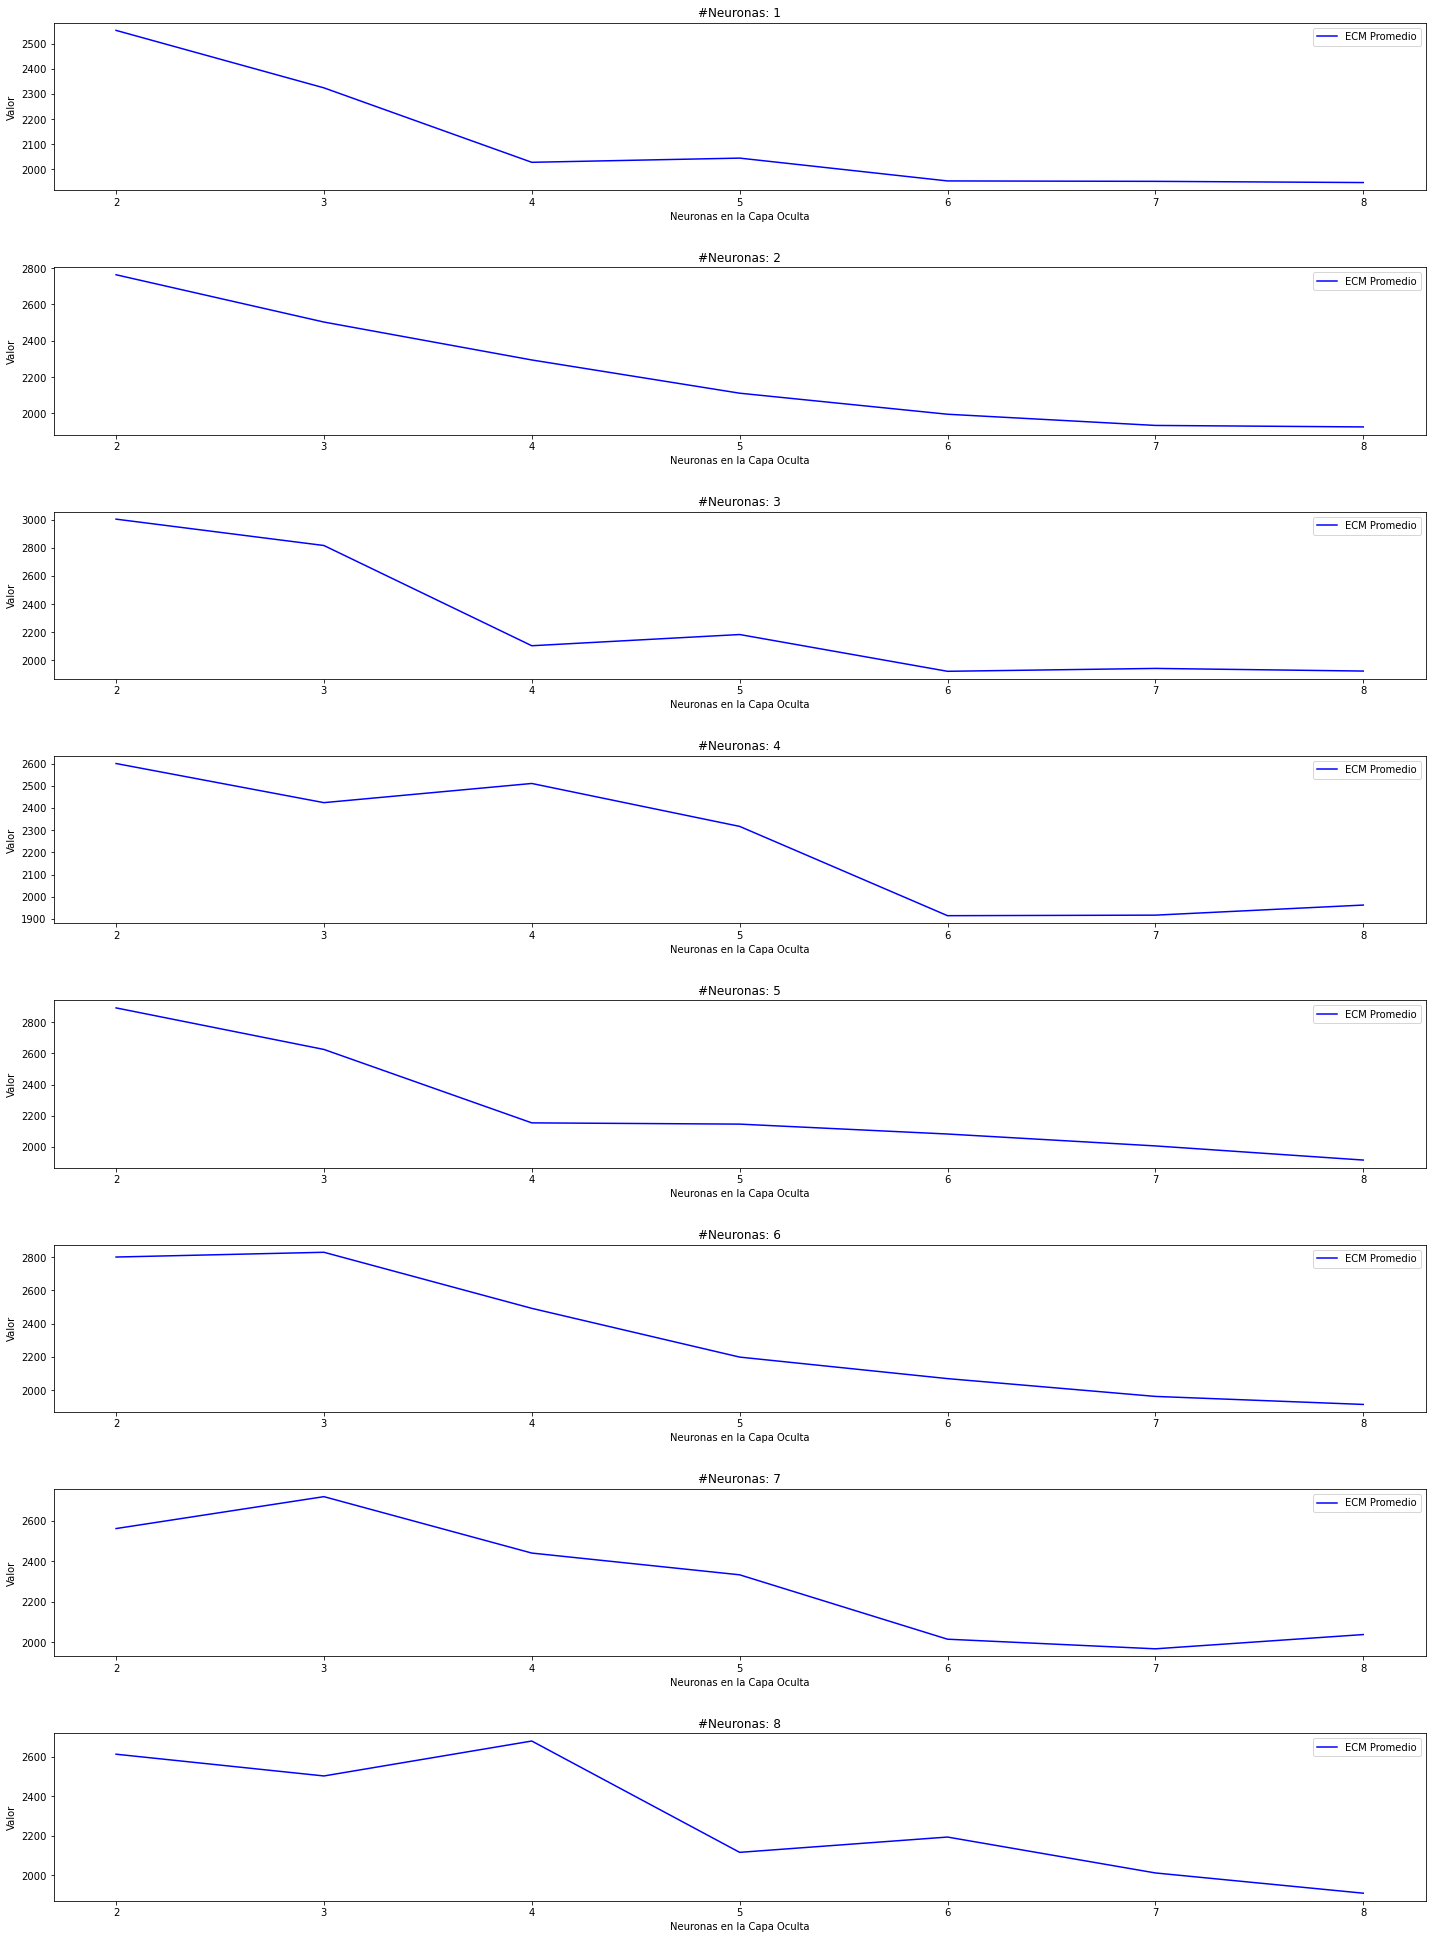

In [15]:
##Graficar el crecimiento y decrecimiento del error
plt.figure(figsize=(20,30)) 
x_vals = list(range(2, max_layer_size))
for i in range(max_layer_size-1):
    plt.subplot(max_layer_size,1,i+1)   
    plt.xlabel('Neuronas en la Capa Oculta')
    plt.ylabel('Valor')
    plt.title('#Neuronas: '+str(i+1))
    aux_df = benchmark_df[benchmark_df.N_l1 == i+1]
    plt.plot(x_vals,aux_df['ECM_Mean'], label='ECM Promedio', color='blue')
    plt.tight_layout(h_pad=3.0)
    
    plt.legend()


### Modelo seleccionado

Error de predicción: 6536.336543372599


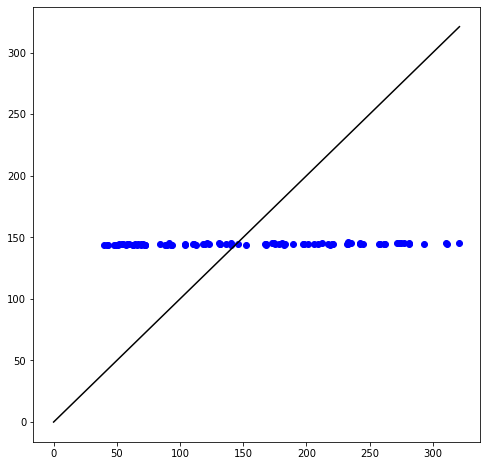

In [23]:
neurons_l1 = best_neural_model['N_l1'].values[0]
neurons_l2 = best_neural_model['N_l2'].values[0]

model = MLPRegressor(hidden_layer_sizes=(int(neurons_l1), int(neurons_l2)),
             activation = 'logistic',
             solver='sgd',
             learning_rate = 'adaptive',
             momentum = 0,
             learning_rate_init = 0.01,
             random_state = 123,
             max_iter = 100000
             )

model.fit(fit_x, fit_y)
scaler = scalers['Y-norm']
forecast_y = model.predict(forecast_x)
forecast_y = scaler.inverse_transform(forecast_y.reshape(-1,1))
forecast_y = transform(trans_y,forecast_y,True)
ecm = mean_squared_error(real_y ,forecast_y) 

print("Error de predicción: " + str(ecm))
plt.figure(figsize=(8, 8))
plt.plot(real_y, forecast_y, 'bo',color='blue')
plt.plot([0, max(real_y)], [0, max(real_y)], color='black')

## Conclusión

Ambos modelos se comportan bastante mal, y no tienen buenos resultados. Inicialmente la Regresión Lineal arroja resultados dudosos ya que solo tiene en cuenta dos variables, sin embargo se ha realizado metículosamente todo el código para encontrar la regresión lineal óptima y no se encontraron errores. El modelo podría mejorar si se obtienen más datos para hacer fitting, se considera que la cantidad de datos actual es el principal factor del gran error de los modelos encontrados.